In [9]:
import numpy as np
import time
import math
from matplotlib import pyplot as plt
import pandas as pd


In [10]:
data = pd.read_csv('../analysis/result1.csv')

In [11]:
open = list(data['open'])
open_truth = list(data['open_truth'])
close = list(data['close'])
close_truth = list(data['close_truth'])
high = list(data['high'])
high_truth = list(data['high_truth'])
low = list(data['low'])
low_truth = list(data['low_truth'])

open -0.06913876045422636 0.03605684712580427


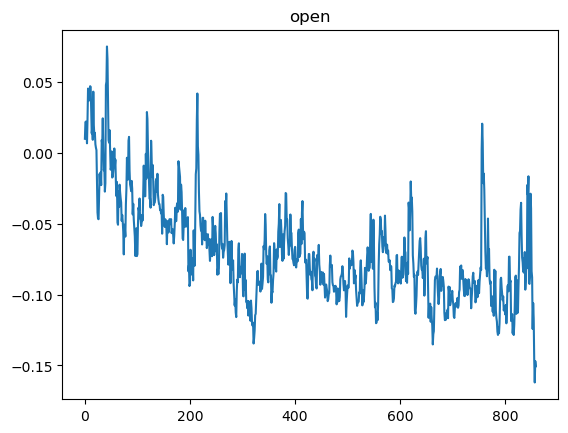

close -0.03130932473085527 0.026948278384789588


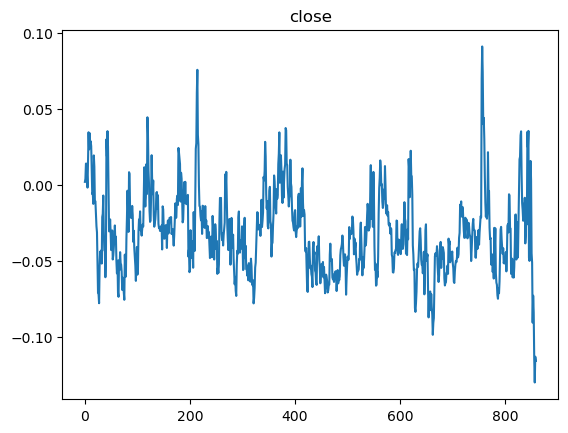

high -0.028133936065601238 0.05010067320264783


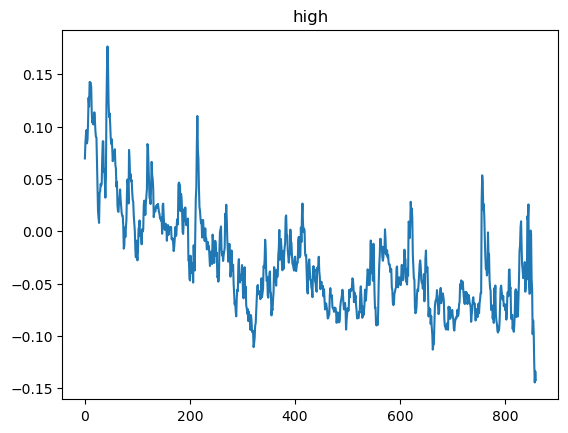

low -0.03375369084170155 0.04621003815705705


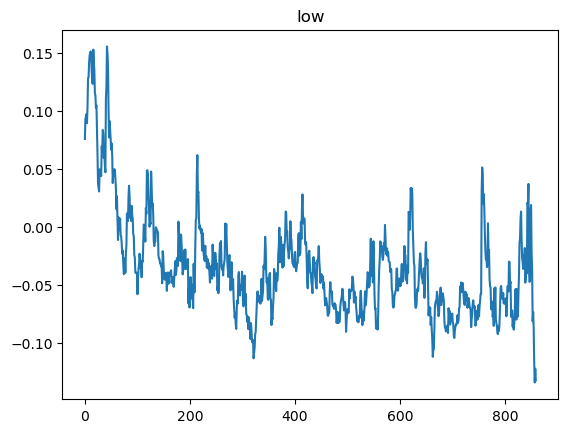

In [12]:
for i in ['open','close','high','low']:
    error = (data[i] - data[i+'_truth'])/data[i+'_truth']
    print(i, error.mean(), error.std())
    plt.title(i)
    plt.plot(error)
    plt.show()